### Impact of Volatility on Option Prices and Greeks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from qp import bs_price, bs_greeks

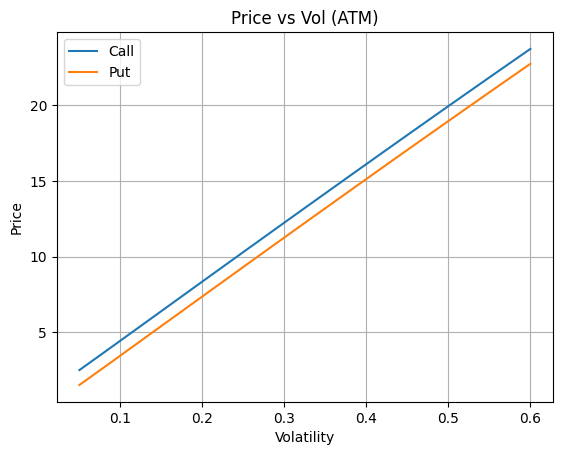

In [159]:
#parameters 
S = 100.0
K = 100.0
r = 0.02
q = 0.01
T = 1.0 
sigmas = np.linspace(0.05, 0.60, 60)

call_prices = [bs_price(S, K, r, q, s, T, "call") for s in sigmas]
put_prices = [bs_price(S, K, r, q, s, T, "put") for s in sigmas]

plt.figure()
plt.plot(sigmas, call_prices, label="Call")
plt.plot(sigmas, put_prices, label="Put")
plt.xlabel("Volatility")
plt.ylabel("Price")
plt.title("Price vs Vol (ATM)")
plt.legend()
plt.grid(True)
plt.show()

Both option prices rise as volatility increases, reflecting the higher probability of the option being in-the-money when price fluctuations become larger.  

- **Call and Put behave similarly**: for ATM strikes, the sensitivity to volatility is almost symmetric.  
- **Interest rate effect**: the call price is slightly above the put price due to the positive risk-free rate (\(r = 2\%\)), which reduces the present value of the strike in the put option. (r > q ⇒ C > P)
- **Interpretation**: volatility directly raises the option’s time value, which explains the nearly linear increase of prices in this range.  

This illustrates the fundamental role of volatility in option valuation: more uncertainty makes both calls and puts more expensive.

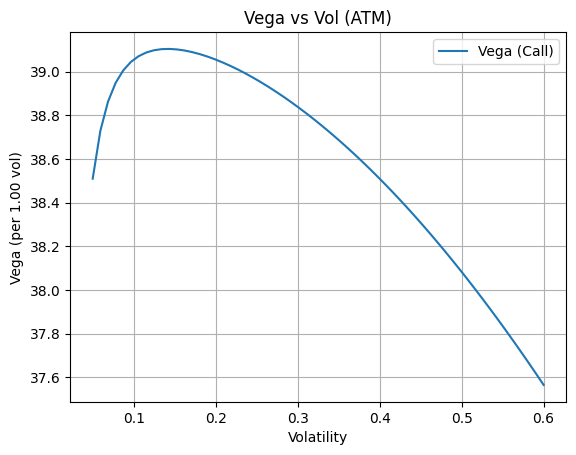

In [160]:

vegas = [bs_greeks(S, K, r, q, s, T, "call")["vega"] for s in sigmas]

plt.figure()
plt.plot(sigmas, vegas, label="Vega (Call)")
plt.xlabel("Volatility")
plt.ylabel("Vega (per 1.00 vol)")
plt.title("Vega vs Vol (ATM)")
plt.legend()
plt.grid(True)
plt.show()




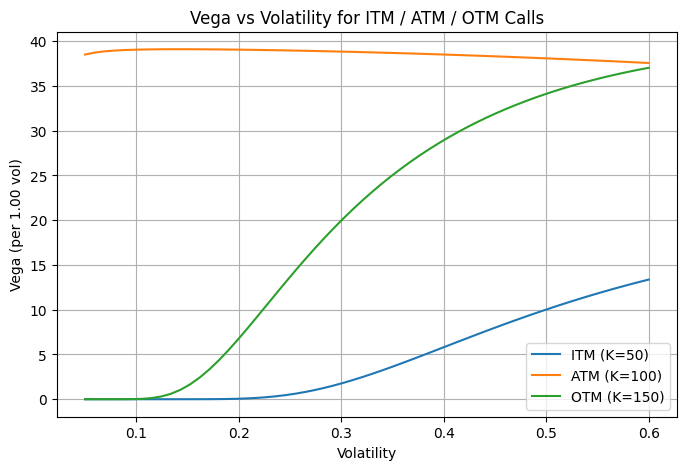

In [161]:

strikes = {
    "ITM (K=50)": 50,
    "ATM (K=100)": 100,
    "OTM (K=150)": 150
}

plt.figure(figsize=(8,5))

for label, K in strikes.items():
    vegas = [bs_greeks(S, K, r, q, s, T, "call")["vega"] for s in sigmas]
    plt.plot(sigmas, vegas, label=label)

plt.xlabel("Volatility")
plt.ylabel("Vega (per 1.00 vol)")
plt.title("Vega vs Volatility for ITM / ATM / OTM Calls")
plt.legend()
plt.grid(True)
plt.show()

- **ATM options** have the highest Vega. This makes sense, since small changes in volatility have the largest impact on the value of an option that is balanced between intrinsic and time value.  
- **ITM and OTM options** start with very low Vega at low volatility. Their values are less sensitive to volatility changes because they are dominated either by intrinsic value (ITM) or by low probability of exercise (OTM).  
- As volatility rises, **OTM Vega increases strongly**. This is because higher volatility raises the likelihood of the option expiring in the money.  
- **ITM Vega increases only gradually**, since the option is already deep in the money and its value depends mostly on the underlying, not on volatility.  

**Conclusion:** ATM options maximize Vega. OTM options gain Vega rapidly as volatility rises (since higher σ increases the chance of expiring ITM), while ITM options stay relatively insensitive, as their value is mostly driven by intrinsic value.

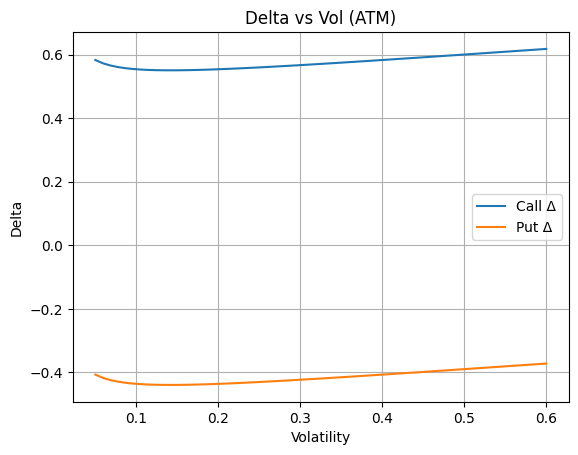

In [168]:
S = 100.0
K = 100.0
r = 0.02
q = 0.01
T = 1.0 
sigmas = np.linspace(0.05, 0.60, 60)


deltas_call = [bs_greeks(S, K, r, q, s, T, "call")["delta"] for s in sigmas]
deltas_put  = [bs_greeks(S, K, r, q, s, T, "put")["delta"]  for s in sigmas]

plt.figure()
plt.plot(sigmas, deltas_call, label="Call Δ")
plt.plot(sigmas, deltas_put,  label="Put Δ")
plt.xlabel("Volatility")
plt.ylabel("Delta")
plt.title("Delta vs Vol (ATM)")
plt.legend()
plt.grid(True)
plt.show()


- **Call Delta**: stays above 0.5 because the forward price is slightly higher than the strike (r>q), which makes the call effectively a bit in the money. As volatility rises, the call delta increases further.
- **Put Delta**: stays above –0.5 in absolute terms for the same reason (the put is slightly out of the money). With higher volatility, the put delta becomes less negative.
- **Symmetry**: If the strike were set to the forward price, the call and put deltas would be symmetric around ±0.5.

**Conclusion**: With spot-ATM options and r>q, call deltas are shifted upward and put deltas upward (less negative). Rising volatility amplifies this effect.

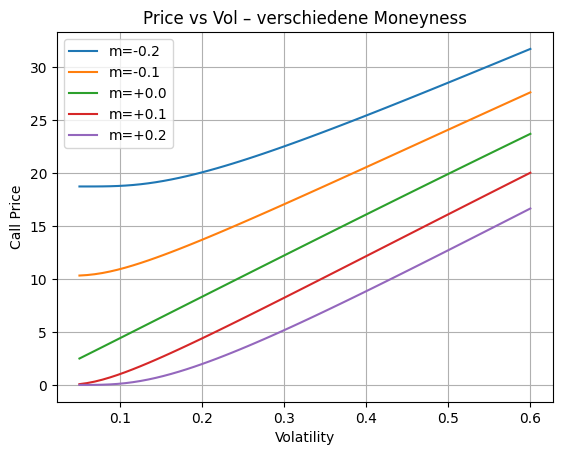

In [163]:
moneyness = [-0.2, -0.1, 0.0, 0.1, 0.2]
curves = {}
for m in moneyness:
    K_m = S * np.exp(m)
    curves[m] = [bs_price(S, K_m, r, q, s, T, "call") for s in sigmas]

plt.figure()
for m, y in curves.items():
    plt.plot(sigmas, y, label=f"m={m:+.1f}")
plt.xlabel("Volatility")
plt.ylabel("Call Price")
plt.title("Price vs Vol – verschiedene Moneyness")
plt.legend()
plt.grid(True)
plt.show()


For all strikes, higher volatility increases the call price because the option’s time value grows.

**Moneyness shift**
- Deep ITM (m = –0.2) starts with the highest price and rises only moderately with volatility, since most of its value is already intrinsic.
- ATM (m = 0.0) shows the steepest slope because its value is most sensitive to volatility.
- OTM (m = +0.2) starts with the lowest price but rises quickly as volatility gives more chance to end up ITM.

**Conclusion**: ATM calls react strongest to volatility changes, while ITM calls are dominated by intrinsic value and OTM calls gain value mainly through higher probability of exercise.

In [164]:
scenarios = [
    {"label": "Low vol", "sigma": 0.10},
    {"label": "Base vol", "sigma": 0.25},
    {"label": "High vol", "sigma": 0.50},
]

rows = []
for sc in scenarios:
    g = bs_greeks(S, K, r, q, sc["sigma"], T, "call")
    rows.append({
        "label": sc["label"],
        "sigma": sc["sigma"],
        **{k: round(v, 4) for k, v in g.items() if k in ["price", "delta", "gamma", "vega", "theta", "rho"]}
    })

df = pd.DataFrame(rows)
print(df.to_string(index=False))


   label  sigma   price  delta  gamma    vega   theta     rho
 Low vol   0.10  4.4406 0.5540 0.0391 39.0554 -2.4180 50.9643
Base vol   0.25 10.3000 0.5599 0.0156 38.9633 -5.2243 45.6901
High vol   0.50 19.9440 0.6004 0.0076 38.0835 -9.7224 40.0946


- Price: goes up as volatility rises, reflecting higher time value.
- Delta: increases only slightly with volatility, since the option is near the money and already balanced.
- Gamma: decreases with higher volatility – the sensitivity of delta is strongest at lower vol.
- Vega: stays high across all scenarios, showing that the option remains very sensitive to volatility changes.
- Theta: becomes more negative with higher volatility, since more time value means faster time decay.
- Rho: decreases as volatility rises, because the option’s value is driven more by volatility than by interest rates.



In [165]:
sigma0 = 0.25
g0 = bs_greeks(S, K, r, q, sigma0, T, "call")
dv_1pct = g0["vega"] / 100.0  # vega per 1%p
print(f"At sigma={sigma0:.2f}, approx dPrice for +1% vol ≈ {dv_1pct:.4f}")

At sigma=0.25, approx dPrice for +1% vol ≈ 0.3896


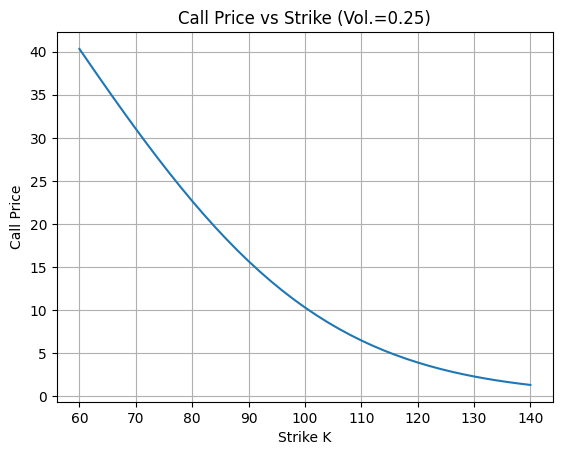

In [166]:
sigma_fix = 0.25
Ks = np.linspace(60, 140, 41)
prices_K = [bs_price(S, Kx, r, q, sigma_fix, T, "call") for Kx in Ks]

plt.figure()
plt.plot(Ks, prices_K)
plt.xlabel("Strike K")
plt.ylabel("Call Price")
plt.title(f"Call Price vs Strike (Vol.={sigma_fix:.2f})")
plt.grid(True)
plt.show()

The call price is lower for higher strikes. A higher strike means the option is less likely to finish in the money and reduces its intrinsic value.

- At low strikes the call is deep in the money → price is high and mainly driven by intrinsic value.
- Around the money, the curve is steepest because the option value is most sensitive to the strike level.
- At very high strikes the call is deep out of the money → price approaches zero.
